**Problem statement**

*Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.*

*Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.*

*You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.*

In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

import collections
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
train  = pd.read_csv('train_agriculture.csv')
test = pd.read_csv('test_agriculture.csv')
sample = pd.read_csv("sample_submission_agriculture.csv")

In [7]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [8]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [9]:
sample.head()

,Unnamed: 0,ID,Crop_Damage
0,0,F00000002,1
1,1,F00000011,1
2,2,F00000014,1
3,3,F00000015,1
4,4,F00000016,1


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [12]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [13]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [14]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [15]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

<AxesSubplot:>

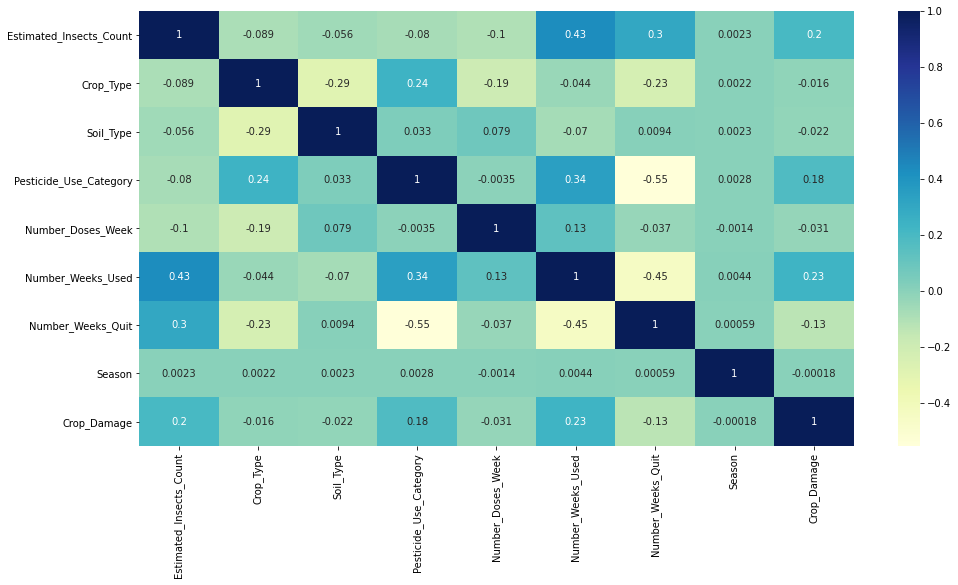

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")

In [20]:
damage = train.groupby(by=("Crop_Damage")).sum().reset_index()
damage

,Crop_Damage,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,97675485,21460,34397,165520,1939040,1825397.0,750594,140847
1,1,22633880,3103,5354,29741,297535,382528.0,93911,23310
2,2,4004062,706,983,5930,60400,77928.0,7642,4403


<AxesSubplot:xlabel='Crop_Damage'>

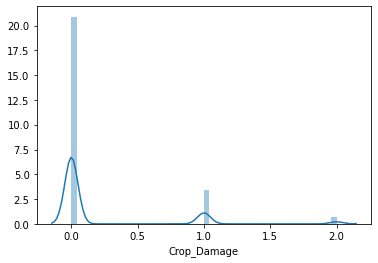

In [21]:
sns.distplot(train["Crop_Damage"])

<AxesSubplot:xlabel='Estimated_Insects_Count'>

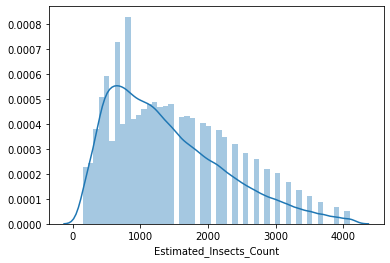

In [22]:
sns.distplot(train['Estimated_Insects_Count'])

In [24]:
insect = train.groupby('Estimated_Insects_Count')['Crop_Damage'].sum().reset_index()
insect

,Estimated_Insects_Count,Crop_Damage
0,150,13
1,151,2
2,168,12
3,169,2
4,188,10
...,...,...
66,3702,261
67,3895,159
68,3896,57
69,4096,111


<AxesSubplot:xlabel='Crop_Type'>

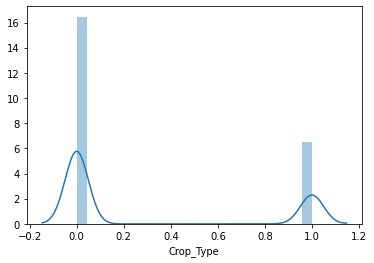

In [25]:
sns.distplot(train['Crop_Type'])

In [27]:
crop = train.groupby('Crop_Type')['Crop_Damage'].sum().reset_index()
crop

,Crop_Type,Crop_Damage
0,0,12418
1,1,4515


<AxesSubplot:xlabel='Soil_Type'>

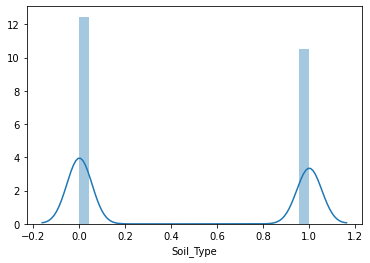

In [28]:
sns.distplot(train['Soil_Type'])

In [30]:
soil = train.groupby('Soil_Type')['Crop_Damage'].sum().reset_index()
soil

,Soil_Type,Crop_Damage
0,0,9613
1,1,7320


<AxesSubplot:xlabel='Pesticide_Use_Category'>

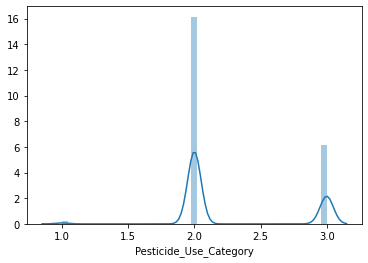

In [31]:
sns.distplot(train['Pesticide_Use_Category'])

In [34]:
pest = train.groupby('Pesticide_Use_Category')['Crop_Damage'].sum().reset_index()
pest

,Pesticide_Use_Category,Crop_Damage
0,1,884
1,2,7430
2,3,8619


<AxesSubplot:xlabel='Number_Doses_Week'>

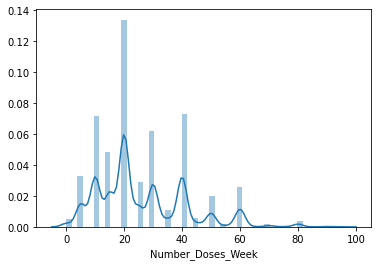

In [35]:
sns.distplot(train['Number_Doses_Week'])

In [36]:
dose = train.groupby(by=("Number_Doses_Week"))["Crop_Damage"].sum().reset_index()
dose

,Number_Doses_Week,Crop_Damage
0,0,884
1,5,553
2,10,1836
3,15,1190
4,20,5558
5,25,692
6,30,2061
7,35,215
8,40,2615
9,45,81


<AxesSubplot:xlabel='Number_Weeks_Used'>

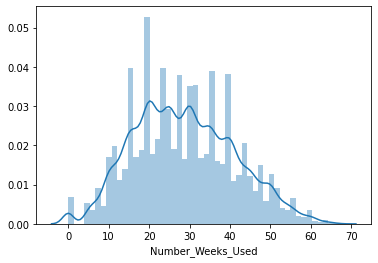

In [37]:
sns.distplot(train['Number_Weeks_Used'])

In [38]:
week = train.groupby(by=("Number_Weeks_Used"))["Crop_Damage"].sum().reset_index()
week

,Number_Weeks_Used,Crop_Damage
0,0.0,771
1,5.0,33
2,6.0,15
3,7.0,18
4,8.0,32
...,...,...
59,63.0,21
60,64.0,21
61,65.0,23
62,66.0,8


<AxesSubplot:xlabel='Number_Weeks_Quit'>

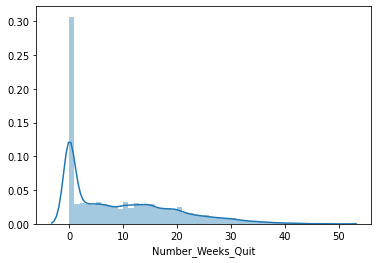

In [39]:
sns.distplot(train['Number_Weeks_Quit'])

In [40]:
quit = train.groupby(by=("Number_Weeks_Quit"))["Crop_Damage"].sum().reset_index()
quit

,Number_Weeks_Quit,Crop_Damage
0,0,9557
1,1,147
2,2,241
3,3,286
4,4,278
5,5,390
6,6,326
7,7,308
8,8,277
9,9,231


<AxesSubplot:xlabel='Season'>

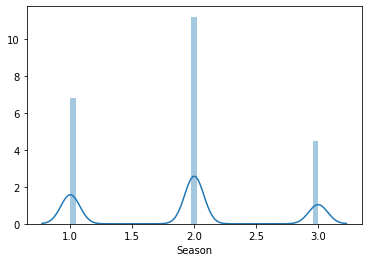

In [41]:
sns.distplot(train['Season'])

In [42]:
season = train.groupby(by=("Season"))["Crop_Damage"].sum().reset_index()
season

,Season,Crop_Damage
0,1,5070
1,2,8543
2,3,3320


In [44]:
#define X, y and x_test
ID = test.ID

y = train.Crop_Damage
X = train.drop(["ID", "Crop_Damage"], axis=1)
X_test = test.drop(["ID"], axis=1)

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 5.4 MB


In [50]:
numeric_features = [0, 1, 2, 3, 4, 5, 6, 7]
numeric_transformer = Pipeline(steps=[('imputer', IterativeImputer(random_state=1)),
    ('scaler', StandardScaler())])

#categorical_features = ['Embarked', 'Sex', 'Pclass', 'Title']
#categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        #('cat', categorical_transformer, categorical_features)
        ])

In [53]:
#split training set for training and testing

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((79972, 8), (8886, 8), (79972,), (8886,), (59310, 8))

In [55]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', CatBoostClassifier(loss_function='MultiClass', class_weights= [.21, .82, .97], iterations=3000, depth=10, random_state=1))]).fit(X_train, y_train)
print(model.score(X_train, y_train))

Learning rate set to 0.039103
0:	learn: 1.0742151	total: 533ms	remaining: 26m 37s
1:	learn: 1.0518582	total: 686ms	remaining: 17m 7s
2:	learn: 1.0314373	total: 811ms	remaining: 13m 30s
3:	learn: 1.0126341	total: 926ms	remaining: 11m 33s
4:	learn: 0.9951353	total: 1.05s	remaining: 10m 27s
5:	learn: 0.9785738	total: 1.14s	remaining: 9m 31s
6:	learn: 0.9635508	total: 1.24s	remaining: 8m 49s
7:	learn: 0.9496648	total: 1.35s	remaining: 8m 23s
8:	learn: 0.9367005	total: 1.44s	remaining: 8m
9:	learn: 0.9243071	total: 1.55s	remaining: 7m 42s
10:	learn: 0.9129279	total: 1.64s	remaining: 7m 26s
11:	learn: 0.9021844	total: 1.75s	remaining: 7m 14s
12:	learn: 0.8924785	total: 1.84s	remaining: 7m 3s
13:	learn: 0.8833440	total: 1.95s	remaining: 6m 55s
14:	learn: 0.8747590	total: 2.04s	remaining: 6m 46s
15:	learn: 0.8667791	total: 2.15s	remaining: 6m 40s
16:	learn: 0.8589620	total: 2.24s	remaining: 6m 33s
17:	learn: 0.8517108	total: 2.34s	remaining: 6m 27s
18:	learn: 0.8449474	total: 2.44s	remaining: 

limit_output extension: Maximum message size of 10000 exceeded with 10036 characters

In [56]:
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model.get_params()
print(params)

{'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=1)),
                                                 ('scaler', StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7])])), ('classifier', <catboost.core.CatBoostClassifier object at 0x00000145AC9687F0>)], 'verbose': False, 'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=1)),
                                                 ('scaler', StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7])]), 'classifier': <catboost.core.CatBoostClassifier object at 0x00000145AC9687F0>, 'preprocessor__n_jobs': None, 'preprocessor__remainder': 'drop', 'preprocessor__sparse_threshold': 0.3

In [57]:
y_pred = model.predict(X_val)

df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred.ravel()})
df

,Actual,Predicted
30555,0,0
37993,0,0
72387,0,0
30750,1,1
6458,0,0
...,...,...
70597,1,0
85070,0,0
5794,1,0
86532,0,0


<AxesSubplot:>

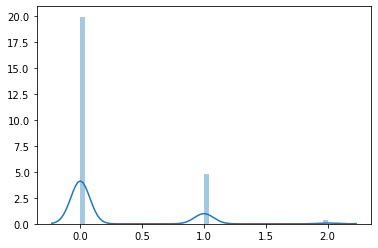

In [59]:
sns.distplot(y_pred)

In [64]:
collections.Counter(y_val)

Counter({0: 7424, 1: 1231, 2: 231})

In [65]:
collections.Counter(y_pred.ravel())

Counter({0: 7073, 1: 1686, 2: 127})

In [68]:
#Create a confusion matrix

confusion_matrix(y_val, y_pred)

array([[6390,  972,   62],
       [ 612,  569,   50],
       [  71,  145,   15]], dtype=int64)

In [69]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_val, y_pred))
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column
pd.DataFrame(confmtrx, index=['Alive','Other_Causes', 'Pesticides'],
columns=['predicted_Alive', 'predicted_Other_Causes', 'predicted_Pesticides'])

,predicted_Alive,predicted_Other_Causes,predicted_Pesticides
Alive,6390,972,62
Other_Causes,612,569,50
Pesticides,71,145,15


In [71]:
#Accuracy statistics
print('Accuracy Score:', accuracy_score(y_val, y_pred)) 

#Create classification report
class_report=classification_report(y_val, y_pred)
print(class_report)

Accuracy Score: 0.7848300697726761
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7424
           1       0.34      0.46      0.39      1231
           2       0.12      0.06      0.08       231

    accuracy                           0.78      8886
   macro avg       0.45      0.46      0.45      8886
weighted avg       0.80      0.78      0.79      8886



In [72]:
predictions = model.predict(X_test)
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [73]:
submission = pd.DataFrame({
        "ID": ID,
        "Crop_Damage": predictions.ravel()
    })
submission.to_csv('submission.csv', index=False)
submission

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,1
59308,F00155943,1
